In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#declaring x as symbol
x = sp.Symbol('x')

In [4]:
def Newton_Raphson(f, ig, err_tol):
    exp = sp.sympify(f, evaluate = False) # changing string to sympy function
    delta = sp.diff(exp, x) #derivative of exp 
    
    data = []
    error_diff = err_tol
    init_guess = ig
    f_x = d_x = next_guess = 0
    while (err_tol <= error_diff):
        f_x = (exp.subs(x, init_guess)).evalf()
        d_x = (delta.subs(x, init_guess)).evalf()
        next_guess = (init_guess - (f_x/d_x)).evalf()
        error_diff = abs((f_x/d_x).evalf())
        
        row = [round(init_guess,5) , round(f_x, 5) , round(d_x, 5) , round(next_guess,5 ) , round(error_diff, 5)]
        data.append(row)
        
        init_guess = next_guess
        
    df = pd.DataFrame(data, columns = ["x(n)", "f(x)", "f'(x)", "x(n+1)", "e(n) - e(n-1)"])
    return [data, df]

In [12]:
f = " x**3 - x - 1"
func = sp.sympify(f, evaluate = False)
error_diff = 0.000001
init_guess = 1
solution = Newton_Raphson(f, init_guess, error_diff)
solution[1]

,x(n),f(x),f'(x),x(n+1),e(n) - e(n-1)
0,1,-1.00000000000000,2.00000000000000,1.50000,0.50000
1,1.50000,0.87500,5.75000,1.34783,0.15217
2,1.34783,0.10068,4.44991,1.32520,0.02263
3,1.32520,0.00206,4.26847,1.32472,0.00048
4,1.32472,0.0,4.26463,1.32472,0.0


In [13]:
x_values = [x_val[0] for x_val in solution[0]]
y_values = [y_val[1] for y_val in solution[0]]
root = float((x_values[-1]).evalf())

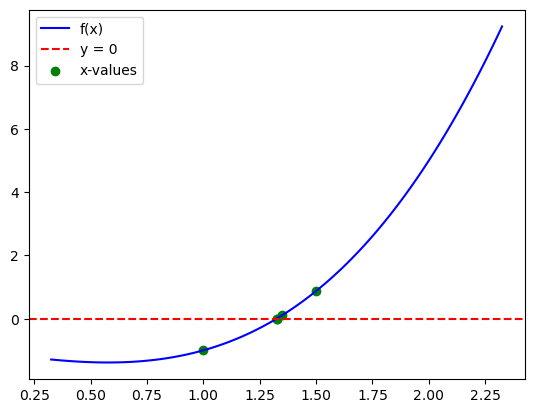

In [14]:
f_numeric = sp.lambdify(x, func, 'numpy')
x_vals = np.linspace(root+1, root-1, 100)
y_vals = f_numeric(x_vals)
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x)', linestyle='-', color='blue')
ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
ax.scatter(x_values, y_values, color='green', label='x-values')
plt.legend(loc='upper left')
plt.show()